#Word Embedding from Scratch with PyTorch

Importing necessary libararies

In [5]:
%pip install lightning
%pip install matplotlib
%pip install seaborn

In [8]:
import torch
import torch.nn as nn

from torch.optim import Adam
from torch.distributions.uniform import Uniform
from torch.utils.data import TensorDataset, DataLoader

import lightning as L

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Project Description

In this simple project, we will create a word embedding for these two phrases

- **Troll 2 is great!**
- **Gymkata is great!**

We will need to create an input for each unique token in the Training Data.

to do this, we'll use one-hot encoding to encode our sequence of input token : **Troll 2 is great! Gymkata**

In [22]:
inputs = torch.tensor([[1., 0., 0., 0.],
                       [0., 1., 0., 0.,],
                       [0., 0., 1., 0.,],
                       [0., 0., 0., 1.,]
                      ])

labels = torch.tensor([[0., 1., 0., 0.],
                       [0., 0., 1., 0.],
                       [0., 0., 0., 1.],
                       [0., 1., 0., 0.]])

# Combine the inputs and labels into dataset

dataset = TensorDataset(inputs, labels)

# Create a dataloader
dataloader = DataLoader(dataset)

for input, label in dataloader:
  print(input[0], label)
  break

tensor([1., 0., 0., 0.]) tensor([[0., 1., 0., 0.]])


##Creating the model

Now that we've prepared our training data, let's begin creating the neural network for our word embedding model.

In [25]:
class WordEmbeddingFromScratch(L.LightningModule):
    def __init__(self):
      # Create and initialize weight tensors, and create the loss function
      super().__init__()

      # Intialize random weight using uniform distribution between -0.5 and 0.5

      min_value = -0.5
      max_value = 0.5

      # Inputs
      self.input1_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
      self.input1_w2 = nn.Parameter(Uniform(min_value, max_value).sample())

      self.input2_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
      self.input2_w2 = nn.Parameter(Uniform(min_value, max_value).sample())

      self.input3_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
      self.input3_w2 = nn.Parameter(Uniform(min_value, max_value).sample())

      self.input4_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
      self.input4_w2 = nn.Parameter(Uniform(min_value, max_value).sample())

      # Outputs
      self.output1_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
      self.output1_w2 = nn.Parameter(Uniform(min_value, max_value).sample())

      self.output2_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
      self.output2_w2 = nn.Parameter(Uniform(min_value, max_value).sample())

      self.output3_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
      self.output3_w2 = nn.Parameter(Uniform(min_value, max_value).sample())

      self.output4_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
      self.output4_w2 = nn.Parameter(Uniform(min_value, max_value).sample())

      self.loss = nn.CrossEntropyLoss()

    def forward(self, input):
      # Make forward pass through the network
      inputs_w1 = {
          1: self.input1_w1,
          2: self.input2_w1,
          3: self.input3_w1,
          4: self.input4_w1
      }

      inputs_w2 = {
          1: self.input1_w2,
          2: self.input2_w2,
          3: self.input3_w2,
          4: self.input4_w2
      }

      inputs_to_top_hidden = 0
      inputs_to_bottom_hidden = 0

      for i, (key, value) in enumerate(inputs_w1.items()):
        inputs_to_top_hidden += input[0][i] * value

      for i, (key, value) in enumerate(inputs_w2.items()):
        inputs_to_bottom_hidden += input[0][i] * value

      output1 = ((inputs_to_top_hidden * self.output1_w1) + (inputs_to_bottom_hidden * self.output1_w2))
      output2 = ((inputs_to_top_hidden * self.output2_w1) + (inputs_to_bottom_hidden * self.output2_w2))
      output3 = ((inputs_to_top_hidden * self.output3_w1) + (inputs_to_bottom_hidden * self.output3_w2))
      output4 = ((inputs_to_top_hidden * self.output4_w1) + (inputs_to_bottom_hidden * self.output4_w2))

      output_presoftmax = torch.stack([output1, output2, output3, output4])

      return output_presoftmax

    def configure_optimizers(self):
      # Configure Adam optimizer
      return Adam(self.parameters(), lr=0.1)

    def training_step(self, batch, batch_idx):
      # Calculate loss
      input_i, label_i = batch
      output_i = self(input_i)
      loss = self.loss(output_i, label_i[0])
      return loss

##Instantiating the model

In [26]:
modelFromScratch = WordEmbeddingFromScratch()

print("Before optimization, the parameters are...")
for name, param in modelFromScratch.named_parameters():
  print(name, param.data)

Before optimization, the parameters are...
input1_w1 tensor(-0.2990)
input1_w2 tensor(0.2565)
input2_w1 tensor(0.0205)
input2_w2 tensor(-0.3456)
input3_w1 tensor(0.3612)
input3_w2 tensor(-0.3832)
input4_w1 tensor(-0.2714)
input4_w2 tensor(0.1483)
output1_w1 tensor(0.4054)
output1_w2 tensor(-0.0377)
output2_w1 tensor(0.1094)
output2_w2 tensor(-0.2242)
output3_w1 tensor(0.2970)
output3_w2 tensor(-0.3695)
output4_w1 tensor(-0.1783)
output4_w2 tensor(-0.2509)


To make it easier for us to see, let's graph the embedding values.

In [27]:
data = {
    "w1" : [
            modelFromScratch.input1_w1.item(),
            modelFromScratch.input2_w1.item(),
            modelFromScratch.input3_w1.item(),
            modelFromScratch.input4_w1.item()
    ],
    "w2" : [
            modelFromScratch.input1_w2.item(),
            modelFromScratch.input2_w2.item(),
            modelFromScratch.input3_w2.item(),
            modelFromScratch.input4_w2.item()
    ],
    "token" : ["Troll 2", "is", "great", "Gymkata"],
    "input" : ["input1", "input2", "input3", "input4"]
}

df = pd.DataFrame(data)
df

,w1,w2,token,input
0,-0.299031,0.256464,Troll 2,input1
1,0.020520,-0.345564,is,input2
2,0.361239,-0.383239,great,input3
3,-0.271379,0.148297,Gymkata,input4


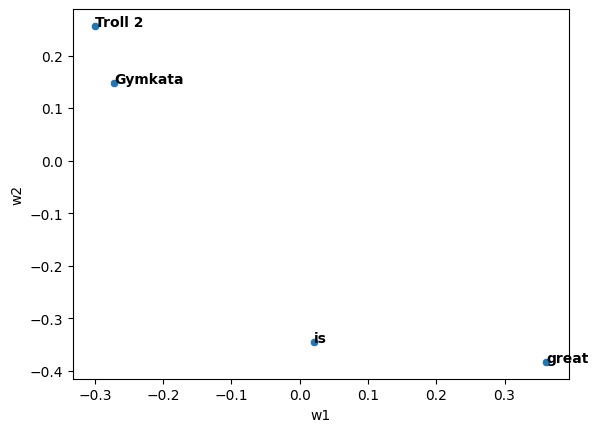

In [28]:
sns.scatterplot(data=df, x="w1", y="w2")

plt.text(df.w1[0], df.w2[0], df.token[0],
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold')

plt.text(df.w1[1], df.w2[1], df.token[1],
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold')

plt.text(df.w1[2], df.w2[2], df.token[2],
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold')

plt.text(df.w1[3], df.w2[3], df.token[3],
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold')

plt.show()

As we can see, the token **Troll 1** and **Gymkata** are relatively far even though they have similar context. So we'll train our model to match them up.

##Training the model

In [29]:
trainer = L.Trainer(max_epochs=100)
trainer.fit(modelFromScratch, dataloader)

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: 
  | Name         | Type             | Params | Mode 
----------------------------------------------------------
0 | loss         | CrossEntropyLoss | 0      | train
  | other params | n/a              | 16     | n/a  
----------------------------------------------------------
16        Trainable params
0         Non-trainable params
16        Total params
0.000     Total estimated model params size (MB)
1         Modules in train mode
0         Modules in eval mode
INFO:lightning.pytorch.callbacks.model_summary:
  | Name         | Type             | Params | Mode 
-----------------------------------------------------

Training: |          | 0/? [00:00<?, ?it/s]

tensor([[1., 0., 0., 0.]])
tensor([[1., 0., 0., 0.]])
tensor([[1., 0., 0., 0.]])
tensor([[1., 0., 0., 0.]])
tensor([[0., 1., 0., 0.]])
tensor([[0., 1., 0., 0.]])
tensor([[0., 1., 0., 0.]])
tensor([[0., 1., 0., 0.]])
tensor([[0., 0., 1., 0.]])
tensor([[0., 0., 1., 0.]])
tensor([[0., 0., 1., 0.]])
tensor([[0., 0., 1., 0.]])
tensor([[0., 0., 0., 1.]])
tensor([[0., 0., 0., 1.]])
tensor([[0., 0., 0., 1.]])
tensor([[0., 0., 0., 1.]])
tensor([[1., 0., 0., 0.]])
tensor([[1., 0., 0., 0.]])
tensor([[1., 0., 0., 0.]])
tensor([[1., 0., 0., 0.]])
tensor([[0., 1., 0., 0.]])
tensor([[0., 1., 0., 0.]])
tensor([[0., 1., 0., 0.]])
tensor([[0., 1., 0., 0.]])
tensor([[0., 0., 1., 0.]])
tensor([[0., 0., 1., 0.]])
tensor([[0., 0., 1., 0.]])
tensor([[0., 0., 1., 0.]])
tensor([[0., 0., 0., 1.]])
tensor([[0., 0., 0., 1.]])
tensor([[0., 0., 0., 1.]])
tensor([[0., 0., 0., 1.]])
tensor([[1., 0., 0., 0.]])
tensor([[1., 0., 0., 0.]])
tensor([[1., 0., 0., 0.]])
tensor([[1., 0., 0., 0.]])
tensor([[0., 1., 0., 0.]])
t

INFO: `Trainer.fit` stopped: `max_epochs=100` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.


tensor([[1., 0., 0., 0.]])
tensor([[1., 0., 0., 0.]])
tensor([[1., 0., 0., 0.]])
tensor([[1., 0., 0., 0.]])
tensor([[0., 1., 0., 0.]])
tensor([[0., 1., 0., 0.]])
tensor([[0., 1., 0., 0.]])
tensor([[0., 1., 0., 0.]])
tensor([[0., 0., 1., 0.]])
tensor([[0., 0., 1., 0.]])
tensor([[0., 0., 1., 0.]])
tensor([[0., 0., 1., 0.]])
tensor([[0., 0., 0., 1.]])
tensor([[0., 0., 0., 1.]])
tensor([[0., 0., 0., 1.]])
tensor([[0., 0., 0., 1.]])
tensor([[1., 0., 0., 0.]])
tensor([[1., 0., 0., 0.]])
tensor([[1., 0., 0., 0.]])
tensor([[1., 0., 0., 0.]])
tensor([[0., 1., 0., 0.]])
tensor([[0., 1., 0., 0.]])
tensor([[0., 1., 0., 0.]])
tensor([[0., 1., 0., 0.]])
tensor([[0., 0., 1., 0.]])
tensor([[0., 0., 1., 0.]])
tensor([[0., 0., 1., 0.]])
tensor([[0., 0., 1., 0.]])
tensor([[0., 0., 0., 1.]])
tensor([[0., 0., 0., 1.]])
tensor([[0., 0., 0., 1.]])
tensor([[0., 0., 0., 1.]])


##Evaluating the result

Now, let's evaluate our training by graphing the word embedding again.

In [30]:
data = {
    "w1" : [
            modelFromScratch.input1_w1.item(),
            modelFromScratch.input2_w1.item(),
            modelFromScratch.input3_w1.item(),
            modelFromScratch.input4_w1.item()
    ],
    "w2" : [
            modelFromScratch.input1_w2.item(),
            modelFromScratch.input2_w2.item(),
            modelFromScratch.input3_w2.item(),
            modelFromScratch.input4_w2.item()
    ],
    "token" : ["Troll 2", "is", "great", "Gymkata"],
    "input" : ["input1", "input2", "input3", "input4"]
}

df = pd.DataFrame(data)
df

,w1,w2,token,input
0,-1.955094,1.412018,Troll 2,input1
1,2.616171,-1.925666,is,input2
2,-1.768192,-2.728667,great,input3
3,-1.756052,1.598243,Gymkata,input4


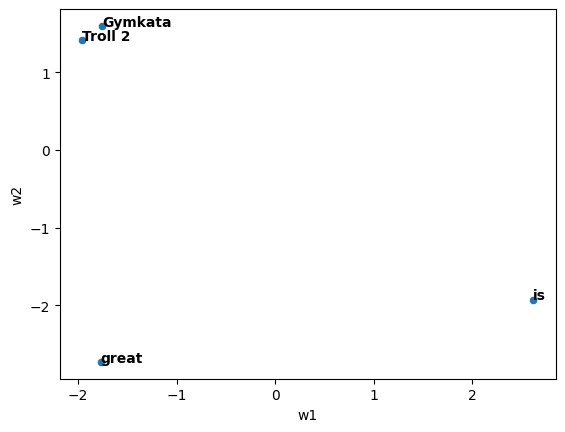

In [31]:
sns.scatterplot(data=df, x="w1", y="w2")

plt.text(df.w1[0], df.w2[0], df.token[0],
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold')

plt.text(df.w1[1], df.w2[1], df.token[1],
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold')

plt.text(df.w1[2], df.w2[2], df.token[2],
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold')

plt.text(df.w1[3], df.w2[3], df.token[3],
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold')

plt.show()

As we can see, **Troll 2** and **Gymkata** are relatively close since they have similar meaning !!